# Part 2 – Exploratory Data Analysis (EDA)

This notebook explores SkyGeni's synthetic sales dataset to understand **why win rate has dropped despite healthy pipeline volume** and to surface **actionable insights** for the CRO.

We will:
- Quantify overall performance and win rate trends.
- Analyze how win rate varies by industry, region, lead source, and stage.
- Define **custom metrics** to diagnose performance (beyond simple win rate).
- Translate findings into **plain business language** and suggested actions.


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [65]:
df = pd.read_csv("../data/skygeni_sales_data.csv")

In [66]:
df.columns, df.shape


(Index(['deal_id', 'created_date', 'closed_date', 'sales_rep_id', 'industry',
        'region', 'product_type', 'lead_source', 'deal_stage', 'deal_amount',
        'sales_cycle_days', 'outcome'],
       dtype='str'),
 (5000, 12))

In [67]:
df.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost


In [68]:
df["wonflag"] = (df["outcome"] == "Won").astype(int)

df["created_date"] = pd.to_datetime(df["created_date"], errors="coerce")
df["closed_date"] = pd.to_datetime(df["closed_date"], errors="coerce")

baseline_wr = df["wonflag"].mean()
print(f"Overall baseline win rate: {baseline_wr:.3f}")


Overall baseline win rate: 0.453


## Overall win rate – baseline

We convert the **outcome** into a numeric flag (`wonflag`) and compute the **overall win rate**.

- This baseline win rate is the anchor for all further analysis.
- At roughly 45 percent, the baseline win rate is broadly healthy for a complex B2B motion, but it still leaves a lot of revenue on the table.
- Any sustained drift below this level over recent months would confirm the CRO’s concern that performance has degraded, even if pipeline volume looks strong.


In [69]:
df.describe(include="all")

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome,wonflag
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000,5000.000000
unique,5000,NaN,NaN,25,5,4,3,4,5,NaN,NaN,2,NaN
top,D00001,NaN,NaN,rep_20,Ecommerce,India,Core,Inbound,Demo,NaN,NaN,Lost,NaN
freq,1,NaN,NaN,230,1060,1286,1694,1262,1043,NaN,NaN,2737,NaN
mean,NaN,2023-08-14 06:10:56.640000,2023-10-17 00:13:32.160000,NaN,NaN,NaN,NaN,NaN,NaN,26286.492800,63.751800,NaN,0.452600
min,NaN,2023-01-01 00:00:00,2023-01-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,7.000000,NaN,0.000000
25%,NaN,2023-04-22 00:00:00,2023-06-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6611.000000,35.750000,NaN,0.000000
50%,NaN,2023-08-14 00:00:00,2023-10-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,14171.500000,64.000000,NaN,0.000000
75%,NaN,2023-12-06 00:00:00,2024-02-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,39062.250000,92.000000,NaN,1.000000
max,NaN,2024-03-26 00:00:00,2024-07-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,100000.000000,120.000000,NaN,1.000000


In [70]:
df[["deal_amount", "sales_cycle_days"]].describe()

,deal_amount,sales_cycle_days
count,5000.000000,5000.000000
mean,26286.492800,63.751800
std,27689.230136,32.731405
min,2002.000000,7.000000
25%,6611.000000,35.750000
50%,14171.500000,64.000000
75%,39062.250000,92.000000
max,100000.000000,120.000000


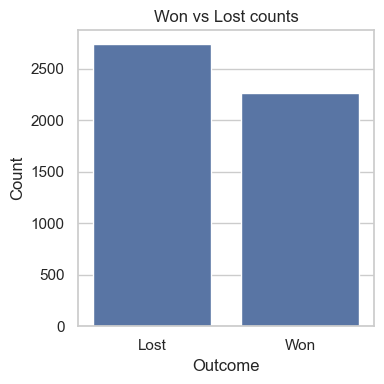

np.float64(0.4526)

In [71]:
outcome_counts = df["outcome"].value_counts()

plt.figure(figsize=(4, 4))
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title("Won vs Lost counts")
plt.ylabel("Count")
plt.xlabel("Outcome")
plt.tight_layout()
plt.show()

win_rate_overall = outcome_counts["Won"] / outcome_counts.sum()
win_rate_overall


## Insight 1 – Baseline win rate and volume mix

We see the overall **share of Won vs Lost deals** and the baseline win rate.

**Why it matters**

- Confirms whether the CRO’s concern is justified: is win rate actually low or deteriorating?
- Provides a reference point for segment‑level comparisons (e.g., industry or region).

**Possible action**

- Use this baseline when setting realistic targets for teams and when evaluating uplift from any intervention.


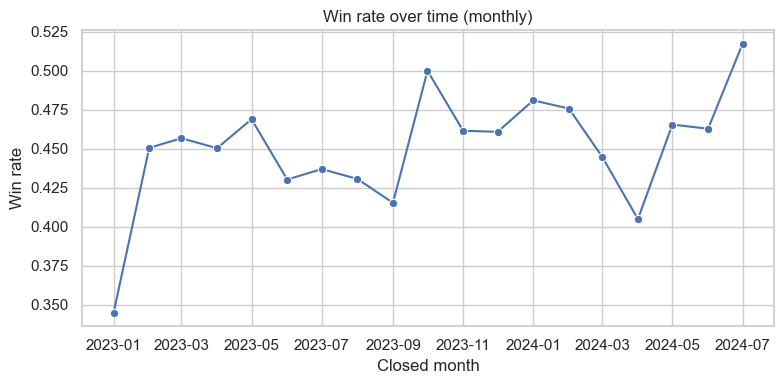

,closed_month,winrate
14,2024-03-01,0.444767
15,2024-04-01,0.404930
16,2024-05-01,0.465517
17,2024-06-01,0.462810
18,2024-07-01,0.517241


In [72]:
df["closed_month"] = df["closed_date"].dt.to_period("M").dt.to_timestamp()

monthly_wr = (
    df.groupby("closed_month")["wonflag"]
      .mean()
      .reset_index(name="winrate")
)

plt.figure(figsize=(8, 4))
sns.lineplot(data=monthly_wr, x="closed_month", y="winrate", marker="o")
plt.title("Win rate over time (monthly)")
plt.xlabel("Closed month")
plt.ylabel("Win rate")
plt.tight_layout()
plt.show()

monthly_wr.tail()


## Custom Metric 1 – Monthly win rate trend

We define a **custom metric**: win rate by **closed month**.

**Why it matters**

- Directly addresses the CRO’s complaint: *“win rate has dropped over the last two quarters”*.
- Shows whether the decline is a short‑term blip or a sustained downward trend.

**Possible action**

- If the last 2–3 months show a clear drop, the CRO should investigate changes in:
  - ICP (ideal customer profile) targeting,
  - pricing/discount policies,
  - team composition or process changes introduced during that period.


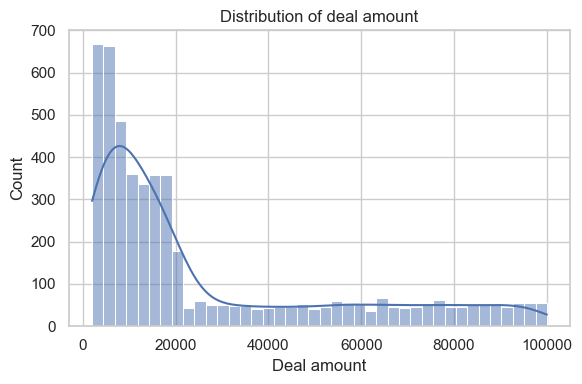

In [73]:
plt.figure(figsize=(6, 4))
sns.histplot(df["deal_amount"], bins=40, kde=True)
plt.title("Distribution of deal amount")
plt.xlabel("Deal amount")
plt.tight_layout()
plt.show()


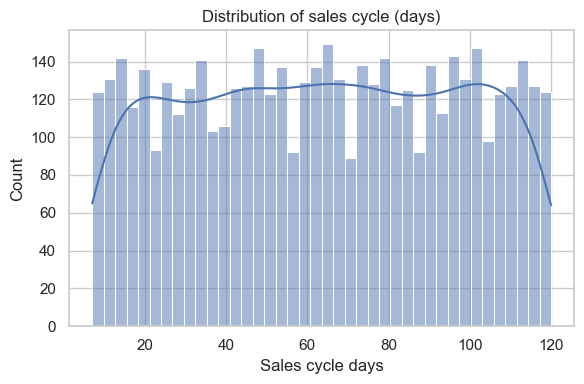

In [74]:
plt.figure(figsize=(6, 4))
sns.histplot(df["sales_cycle_days"], bins=40, kde=True)
plt.title("Distribution of sales cycle (days)")
plt.xlabel("Sales cycle days")
plt.tight_layout()
plt.show()


## Deal size and sales cycle profile

We inspect the distribution of **deal_amount** and **sales_cycle_days**.

**Why it matters**

- Very skewed deal sizes or very long cycles often correlate with execution risk and forecast inaccuracy.
- Helps the CRO understand whether the team is pushing many small deals, a few large ones, or a healthy mix.

**Possible action**

- If most pipeline value sits in a small number of very large, long‑cycle deals, CRO should:
  - Closely monitor those deals,
  - Ensure senior sponsorship and deal reviews.


Win rate by industry


,winrate,deals
industry,,
FinTech,0.477054,937
SaaS,0.451548,1001
Ecommerce,0.449057,1060
HealthTech,0.445545,1010
EdTech,0.441532,992


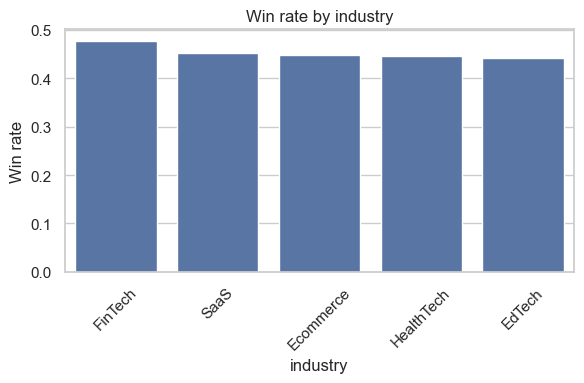

In [75]:
wr_industry = (
    df.groupby("industry")["wonflag"]
      .agg(["mean", "size"])
      .rename(columns={"mean": "winrate", "size": "deals"})
      .sort_values("winrate", ascending=False)
)

print("Win rate by industry")
display(wr_industry)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=wr_industry.reset_index(),
    x="industry",
    y="winrate"
)
plt.title("Win rate by industry")
plt.ylabel("Win rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Insight 2 – Industry‑level win rate differences

Industries show **meaningful variation** in win rate and volume.

**Why it matters**

- High‑win‑rate industries represent **sweet‑spot markets** where the product and motion fit well.
- Low‑win‑rate industries may indicate poor product fit, weak messaging, or wrong targeting.

**Possible action**

- **Double‑down** on high‑win‑rate industries with more marketing spend and SDR focus.
- **De‑prioritize or reposition** in low‑win‑rate industries, or adjust messaging/packaging for better fit.


Win rate by region


,winrate,deals
region,,
India,0.457232,1286
Europe,0.455799,1233
APAC,0.449275,1242
North America,0.447942,1239


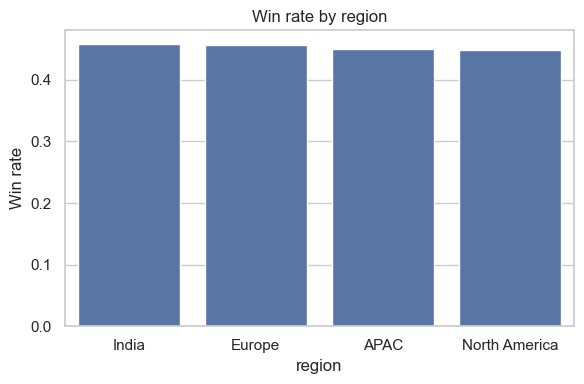

In [76]:
wr_region = (
    df.groupby("region")["wonflag"]
      .agg(["mean", "size"])
      .rename(columns={"mean": "winrate", "size": "deals"})
      .sort_values("winrate", ascending=False)
)

print("Win rate by region")
display(wr_region)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=wr_region.reset_index(),
    x="region",
    y="winrate"
)
plt.title("Win rate by region")
plt.ylabel("Win rate")
plt.tight_layout()
plt.show()


## Regional performance patterns

Regions also differ in win rate and volume.

**Why it matters**

- Reveals where GTM execution, local competition, or territory coverage may be stronger or weaker.
- Helps the CRO decide whether to rebalance **headcount and quota** across regions.

**Possible action**

- Shift pipeline coverage, marketing budgets, or enablement focus from low‑conversion regions to high‑conversion ones.
- For underperforming regions, review:
  - deal qualification quality,
  - local competitive dynamics,
  - language/region‑specific objections.


Win rate by lead source


,winrate,deals
lead_source,,
Inbound,0.460380,1262
Referral,0.455272,1252
Outbound,0.455056,1246
Partner,0.439516,1240


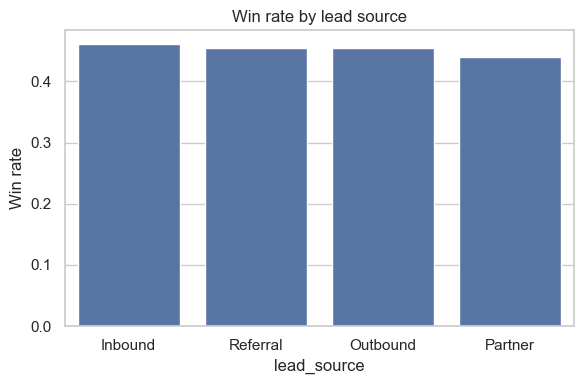

In [77]:
wr_lead = (
    df.groupby("lead_source")["wonflag"]
      .agg(["mean", "size"])
      .rename(columns={"mean": "winrate", "size": "deals"})
      .sort_values("winrate", ascending=False)
)

print("Win rate by lead source")
display(wr_lead)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=wr_lead.reset_index(),
    x="lead_source",
    y="winrate"
)
plt.title("Win rate by lead source")
plt.ylabel("Win rate")
plt.tight_layout()
plt.show()


## Insight 3 – Lead‑source quality

Different **lead sources** (Inbound, Outbound, Referral, Partner) have different win rates.

**Why it matters**

- Shows which marketing / demand‑gen channels produce **high‑quality opportunities** versus noise.
- Helps the CRO and RevOps team allocate **budget and SDR effort** to the most effective channels.

**Possible action**

- Invest more in high‑win‑rate sources (e.g., Referrals or certain inbound campaigns).
- Tighten qualification rules or messaging for low‑win‑rate sources (e.g., cold outbound).


Win rate by deal stage


,winrate,deals
deal_stage,,
Closed,0.467402,997
Negotiation,0.466332,995
Demo,0.458293,1043
Proposal,0.446977,1009
Qualified,0.422594,956


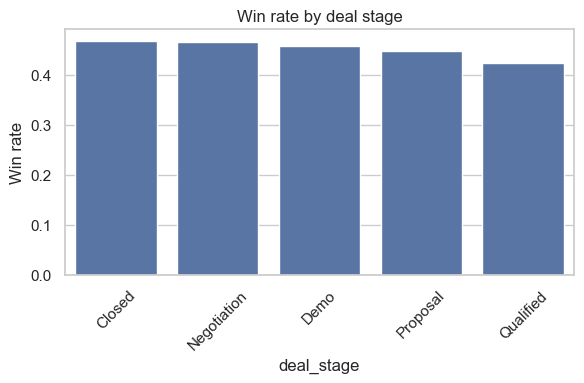

In [78]:
wr_stage = (
    df.groupby("deal_stage")["wonflag"]
      .agg(["mean", "size"])
      .rename(columns={"mean": "winrate", "size": "deals"})
      .sort_values("winrate", ascending=False)
)

print("Win rate by deal stage")
display(wr_stage)

plt.figure(figsize=(6, 4))
sns.barplot(
    data=wr_stage.reset_index(),
    x="deal_stage",
    y="winrate"
)
plt.title("Win rate by deal stage")
plt.ylabel("Win rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Stage‑level conversion behavior

Win rate by **current stage** shows where deals tend to die.

**Why it matters**

- Identifies **bottleneck stages** (e.g., many deals stuck in Proposal or Negotiation that eventually lose).
- Highlights where enablement, playbooks, or pricing support are most needed.

**Possible action**

- If a stage has high volume but low conversion, design:
  - specific objection‑handling scripts,
  - targeted training,
  - deal review checkpoints for that stage.


In [79]:
high_value_threshold = df["deal_amount"].quantile(0.75)

df["is_high_value"] = df["deal_amount"] >= high_value_threshold

hv_summary = (
    df.groupby("is_high_value")["wonflag"]
      .agg(["mean", "size"])
      .rename(columns={"mean": "winrate", "size": "deals"})
)

hv_summary


,winrate,deals
is_high_value,,
False,0.4488,3750
True,0.4640,1250


C:\Users\shajj\AppData\Local\Temp\ipykernel_12772\2640235633.py:10: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\shajj\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


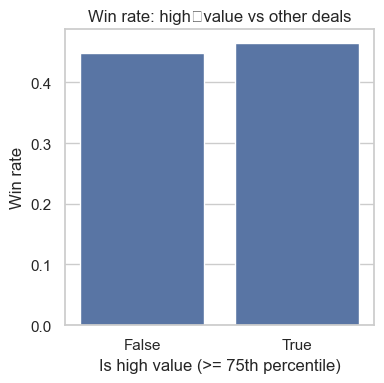

In [80]:
plt.figure(figsize=(4, 4))
sns.barplot(
    data=hv_summary.reset_index(),
    x="is_high_value",
    y="winrate"
)
plt.title("Win rate: high‑value vs other deals")
plt.xlabel("Is high value (>= 75th percentile)")
plt.ylabel("Win rate")
plt.tight_layout()
plt.show()


## Custom Metric 2 – High‑value win rate

We define a **custom metric**: win rate on **high‑value deals** (top 25% by ACV).

**Why it matters**

- CROs care more about **revenue** than count of wins.
- A drop in win rate on high‑value deals can hurt bookings even if overall win rate looks stable.

**Possible action**

- If high‑value win rate is weak:
  - Assign more experienced reps or dedicated deal coaches to big opportunities.
  - Involve leadership earlier in the sales process for large deals.


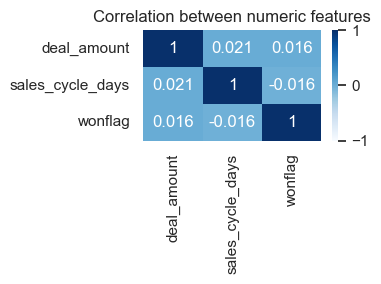

In [81]:
num_cols = ["deal_amount", "sales_cycle_days", "wonflag"]
corr = df[num_cols].corr()

plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation between numeric features")
plt.tight_layout()
plt.show()
